(opto)=
# Optische Sensoren bewerten

## Lernziele für den Abschnitt *Optische Sensoren bewerten*

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lernziele für den Abschnitt:</b></div>
    <ul>
        <li> Messprinzipien und Anwendungsgebiete für optische Sensoren beschreiben </li>
        <li> mithilfe von physikalischen Zusammenhängen </li>
        <li> um optische Sensoren passend einzusetzen </li>
    </ul>
</div>

## python konfigurieren

### Module importieren

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm
import numpy as np
import scipy
from scipy.stats import norm
import pandas as pd
import locale
import distutils.spawn
from distutils.spawn import find_executable
import IPython.display
from IPython.display import display, Latex, IFrame

print('matplotlib', matplotlib.__version__)
print('numpy', np.__version__)
print('scipy', scipy.__version__)
print('pandas', pd.__version__)
print('locale', locale)
print('distutils.spawn', distutils.spawn)
print('IPython.display', IPython.display)
print('schemdraw', schemdraw.__version__)

matplotlib 3.7.1
numpy 1.24.2
scipy 1.10.1
pandas 1.5.3
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/locale.py'>
distutils.spawn <module 'distutils.spawn' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/setuptools/_distutils/spawn.py'>
IPython.display <module 'IPython.display' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/sen/lib/python3.10/site-packages/IPython/display.py'>
schemdraw 0.15


### Grafikparameter einstellen

In [3]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

## Grundlagen der Optik: Reflexion und Brechung

Lichtgeschwindigkeit im Vakuum $c = 2,99792458\cdot 10^8 \text{ m/s}$

Lichtgeschwindigkeit in allen Medien *kleiner* als im Vakuum

Reflexion: Einfallswinkel = Ausfallswinkel $\alpha_1 = \alpha_2$

Brechung (Snellius): 

\begin{equation}
\frac{\sin \alpha_1}{\sin \alpha_2} = \frac{n_2}{n_1} = \frac{c_1}{c_2}\text{ mit }n=\text{Brechungsindex}
\end{equation}

Fokussierung und Kollimation (Parallelisierung) von Strahlbündeln mit Linsen oder Konkavspiegeln (Hohlspiegeln)

![Grundlagen](../img/opto-basics.png)

## Antireflexschichten oder optische Filter

Interferenz eines kohärenten Strahls an einer dünnen planparallelen Schicht {cite:p}`hering_physik_2021`

Geometrische Wegdifferenz 1' und 2': $\text{AB}+\text{BC}-\text{AP}$<br>
optisch: $n(\text{AB}+\text{BC})-\text{AP}\rightarrow \text{AB}+\text{BC} = 2d/\cos\varepsilon'$<br>
$\text{AP} = 2d\tan\varepsilon'\sin\varepsilon$<br>
mit $n = \sin\varepsilon/\sin\varepsilon'$ ergibt sich Gangdifferenz

\begin{equation}
s = 2d\sqrt{n^2 - \sin^2\varepsilon}
\end{equation}

zusätzlich: 1' erfährt Phasensprung $\pi$ durch Reflexion am dichteren Medium<br>
somit Gangunterschied: $\Delta = 2d\sqrt{n^2 - \sin^2\varepsilon} - \frac{\lambda}{2}$

Bedingung für Helligkeit $\Delta = m\lambda$

Bedingung für Dunkelheit $\Delta = (2m+1)\cdot\lambda/2$

Antireflexschicht: dünne Schicht auf z. B. Glas $\to$ einfallender Strahl wird zweimal reflektiert <br>
Schichtdicke $d$ und $n_2$ so wählen, dass $r_1$ und $r_2$ sich auslöschen

\begin{equation}
d = \frac{\lambda}{4n_2}
\end{equation}

Nur gültig für eine Wellenlänge $\to$ optischer Filter

![Antireflex](../img/opto-antireflection.png)

## Sensoren zur Messung von Winkel und Länge: Inkrementale Sensoren

Inkrementale Sensoren: direkt digitale Sensoren, d.h. Messwert = digitaler Wert (Zählwert) {cite:p}`parthier_messtechnik:_2016`

Genauigkeit bestimmt durch das Messlineal, z. B. unterschiedliche Magnetisierungen oder Hell-/Dunkelphasen, $\geq 10\text{ }\mu\text{m}$ bzw. 1' (Winkel)

Verschiebung des Messlineals $\to$ Impulse

Größe der Positionierungsverschiebung = Quantisierungseinheit mal Impulsanzahl $\to$ relative Wegänderung

Absolute Wegänderung: Nullpunkt messen

Wegrichtung: zweites Messlineal, um eine Viertel Quantisierungseinheit verschoben $\to$ zudem: 4fache Auflösung

![Inkremental](../img/opto-incremental.png)

## Präzisionslängenmessung nach inkrementalem Messprinzip: Laserinterferometer (nach Michelson)

Voraussetzung: kohärentes, monochromatisches Licht der Wellenlänge $\lambda$, z. B. von Laser

*Kohärenzlänge*: zwei Wellen sind kohärent, wenn während der Beobachtungszeit die Phasendifferenz gleich ist $\to$ am Anfang und Ende eines Lichtstrahls gültig

| **Lichtstrahl** | **Kohärenzlänge** |
|---|---|
| Weißes Licht | $1,5$ µm |
| GaAs-Laser | $150\text{ m}$ |
| HeNe-Laser | $2\text{ km}$ |

Laserstrahl wird an halbdurchlässigem Spiegel teils reflektiert zum festen Reflektor, teils durchgelassen zum beweglichen Reflektor, ... bis zum Fotodetektor<br>
Unterscheidung zweier Extremfälle: 
1. Überlagerung beider Lichtstrahlen am Detektor in gleicher Phasenlage $\to$ Addition der Helligkeiten
2. Überlagerung am Detektor mit Phasenverschiebung $\lambda/2$ $\to$ Auslöschung

<a title="Warren Leywon, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Michelson_interferometer.png"><img width="256" alt="Michelson interferometer" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Michelson_interferometer.png/256px-Michelson_interferometer.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:Michelson_interferometer.png">Warren Leywon</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Kontinuierliche Bewegung des beweglichen Reflektors $\to$ durch doppelten Weg Spiegel Reflektor alle $\lambda/2$ ein Helligkeitsmaximum $\to$ Zählung der $N$ Maxima $\to$ Weg {cite:p}`parthier_messtechnik:_2016`

\begin{equation}
\Delta s = N\cdot\frac{\lambda}{2}
\end{equation}

für $650\text{ nm}$ Laserlicht Auflösung $325\text{ nm}$ realisierbar $\to$ höchster Anspruch an mechanische Stabilität und Temperaturkonstanz des Messraums!

## Grundlagen der Optik: Licht = f(Wellenlänge) = f(Frequenz)

\begin{equation}
\lambda = \frac{c}{f} = \frac{c}{2\pi\nu}
\end{equation}

Lichtgeschwindigkeit $c$<br>
Wellenlänge $\lambda$<br>
Lichtfrequenz $f$<br>
Kreisfrequenz $\nu$

![Welle](https://www.didaktikonline.physik.uni-muenchen.de/spezial/infrarot/repetit/bilder/slide0109_image049.png)

https://www.didaktikonline.physik.uni-muenchen.de/spezial/infrarot/repetit/bilder/slide0109_image049.png

## Strahlungsquellen im Spektralbereich der optischen Strahlung

Temperaturstrahler, z. B. Sonne, Glühlampen (großer Wellenlängenbereich)

![Spektrum](https://www.lehrbuch-photovoltaik.de/auflage_6/abbildungen_6/Abbildungen%20Lehrbuch-PV_f-19_1.png)

K. Mertens, www.lehrbuch-photovoltaik.de

Quantenstrahler, z. B. Leuchtdioden, Laser (monochromatische Strahlung)

![roteLED](https://cdn.shopifycdn.net/s/files/1/0459/3106/9589/files/630nm_die_spectrum_large.png?v=1598075682)

https://photongrowled.com/blogs/blog/understanding-the-led-spectrum

Kalibrierung von photoelektrischen Strahlungsdetektoren mit Normlicht A (DIN 5033/T7, DIN 5031/T8) $\to$ Wolfram-Fadenlampe, die sich wie ein schwarzer Strahler bei 2855,6 K verhält {cite:p}`niebuhr_physikalische_2011`

## Schwarze Strahler und spektraler Emissionsgrad oder warum optische Temperaturmessung oft nicht so genau sein kann

Wärmestrahlung oder Temperaturstrahlung: thermisch angeregte elektromagnetische Strahlung, hängt von der Temperatur und der Oberflächenbeschaffenheit des strahlenden Körpers ab

überwiegend infrarote Strahlung

schwarzer Strahler: idealer Wärmestrahler $\to$ bei beliebiger Temperatur, Wellenlänge und Strahlungsrichtung maximal möglicher Wert der spektralen Strahldichte

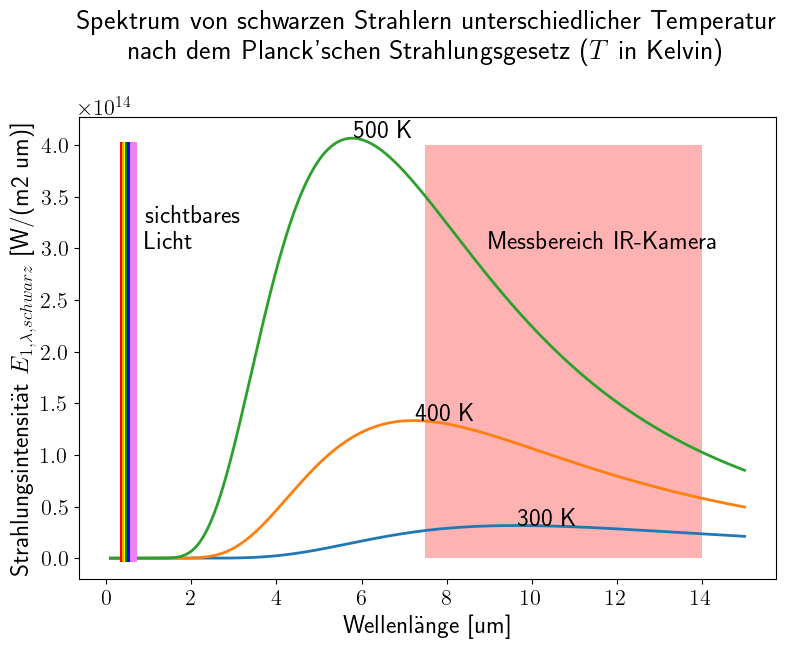

In [4]:
c0=3e8
h=6.6e-34
k=1.38e-23
T=np.linspace(300,500,3)
lam=np.linspace(1e-7,15e-6,1000) # 1e-7 ungefähr Null, sonst Div durch 0
plt.figure(figsize=(9,6))

for t in T:
    E=2*np.pi*h*c0**2/((lam**5)*(np.exp(h*c0/(lam*k*t))-1))
    mx=1e6*np.nanmax(E)
    plt.plot(1e6*lam,1e6*E)
    plt.annotate(str(int(t))+' K',xy=(2898/t,mx), fontsize=18)
plt.xlabel('Wellenlänge [um]')
plt.ylabel('Strahlungsintensität $E_{1,\lambda,schwarz}$ [W/(m2 um)]')# \n$E_{1,\lambda,schwarz}$ [W/(m2 μm)]')
plt.title("Spektrum von schwarzen Strahlern unterschiedlicher Temperatur \nnach dem Planck’schen Strahlungsgesetz ($T$ in Kelvin)"+"\n")

lamvis = np.linspace(400e-9, 750e-9, 10) # sichtbare Wellenlängen
colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
for i in range(len(colors)):
   plt.plot([1e6*lamvis[i],1e6*lamvis[i]], [0,4e14], c=colors[i], lw=5, marker='.')
plt.text(1.2*1e6*lamvis[-1],3e14,'sichtbares \nLicht')
lamIRsens = np.linspace(7.5e-6,14e-6,2) # Messbereich Infrarotkamera FLIR
from matplotlib.patches import Rectangle
currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((1e6*lamIRsens[0], 0), 1e6*(lamIRsens[-1]-lamIRsens[0]), 4e14,
                      alpha=0.3, facecolor='red'))
plt.text(1.2*1e6*lamIRsens[0],3e14,'Messbereich IR-Kamera')
plt.show()

spektraler Emissionsgrad allgemein:

\begin{equation}
\varepsilon(\lambda, T) = \frac{\text{reale spektrale Strahlungsdichte}}{\text{maximale spektrale Strahlungsdichte}}
\end{equation}

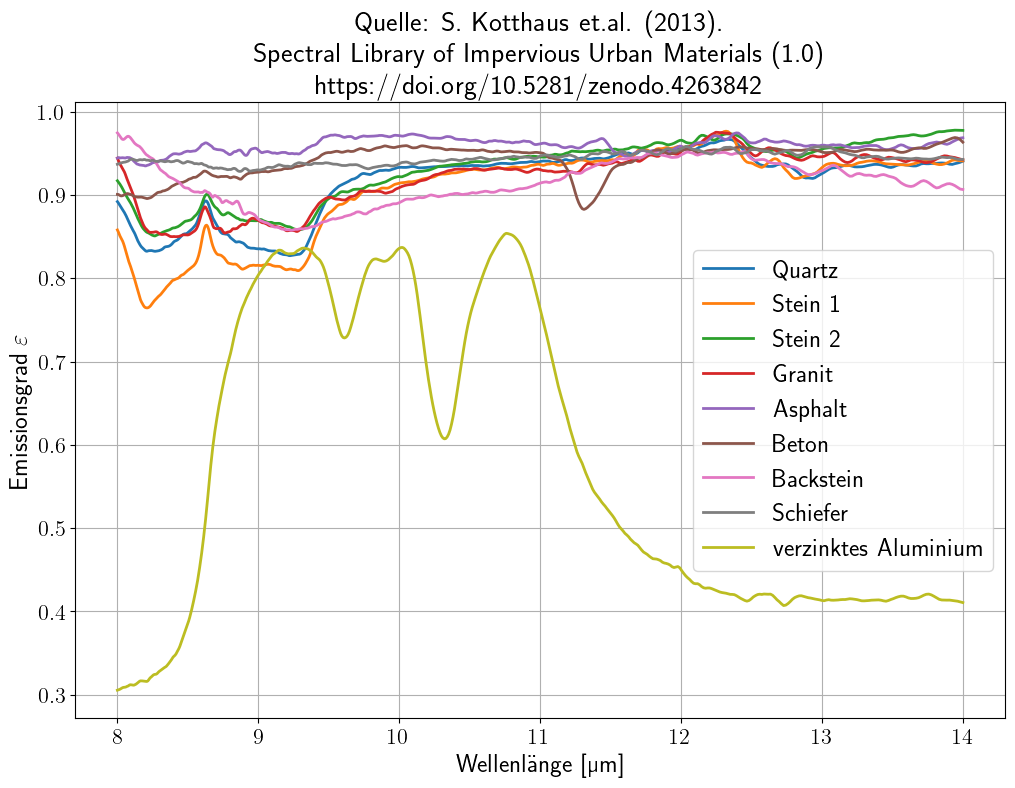

In [5]:
urban = pd.read_csv('https://zenodo.org/record/4263842/files/LUMA_SLUM_IR.csv?download=1')
urban.rename(columns = {'wavelength':'Wellenlänge [µm]',
                       'X001':'Quartz',
                       'S001':'Stein 1',
                       'S003':'Stein 2',
                       'G001':'Granit',
                       'A001':'Asphalt',
                       'C001':'Beton',
                       'B004':'Backstein',
                       'L002':'Schiefer',
                       'Z001':'verzinktes Aluminium'}, inplace = True)
urban.plot(figsize=(12,8),x='Wellenlänge [µm]', y=['Quartz','Stein 1','Stein 2','Granit','Asphalt','Beton',
                                    'Backstein','Schiefer','verzinktes Aluminium'],
          title = 'Quelle: S. Kotthaus et.al. (2013). \nSpectral Library of Impervious Urban Materials (1.0) \nhttps://doi.org/10.5281/zenodo.4263842')
plt.ylabel(r'Emissionsgrad $\varepsilon$')
plt.grid()
plt.show()

spektraler Emissionsgrad bei schwarzen Strahlern: $\varepsilon = 1$ für alle Wellenlängen

Wegen der Energieerhaltung ist für eine Fläche $\alpha(\lambda,T) = \varepsilon(\lambda, T)$ $\to$ idealer Wärmestrahler hat $\alpha = 1$, d.h. er absorbiert alles und reflektiert nichts

![Knotenregel](../img/knotenregel-waermestrahlung.svg)

Reflexion der Umgebungsstrahlung Fehlerquelle bei reflektierenden Flächen

Abhilfe: (wenn möglich) schwarzes Isolierband aufkleben ($\varepsilon \approx 0,97$) oder Loch bohren (wirkt als Hohlraumstrahler)

## Beispiele für Thermografie-Kamera-Anwendungen

<a title="Lutz Weidner, CC BY-SA 2.0 DE &lt;https://creativecommons.org/licenses/by-sa/2.0/de/deed.en&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Ungedaemmte_Aussenwand.jpg"><img width="256" alt="Ungedaemmte Aussenwand" src="https://upload.wikimedia.org/wikipedia/commons/0/01/Ungedaemmte_Aussenwand.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Ungedaemmte_Aussenwand.jpg">Lutz Weidner</a>, <a href="https://creativecommons.org/licenses/by-sa/2.0/de/deed.en">CC BY-SA 2.0 DE</a>, via Wikimedia Commons

Wärmeisolation eines schlecht isolierten Hauses: die Fenster an sich sind gut isoliert (Glasscheiben grün) aber deren Umgebung besteht aus Wärmebrücken (rot)<br>
Frage: warum ist die Regenrinne grün?

<a title="Sönke Krüll, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Elektroschuetz.jpg"><img width="256" alt="Elektroschuetz" src="https://upload.wikimedia.org/wikipedia/commons/4/46/Elektroschuetz.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Elektroschuetz.jpg">Sönke Krüll</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

Defekter Anschluss an einem Relais $\to$ Überhitzung sichtbar - auch ohne genaue Kenntnis des Emissionsgrades bedenklich!

## Strahlungsthermometer

**Anwendung**: bei bewegten Messobjekten, wenn Berührung unmöglich oder Messwert verfälschend, Temperatur zu hoch, Medium korrosiv ... 

Strahlengang {cite:p}`niebuhr_physikalische_2011`: Die Linse $\text{L}_1$ bildet das Messfeld (bei $d_1$) in die Ebene der Messblende MB ab (begrenzt das Messfeld) <br>
Der Detektor wird mit einem Filter F bei hoher Strahlertemperatur durch Abschwächung der Strahlung geschützt.<br>
Alternativ kann der Filter auch ein interessierendes Wellenlängenband durchlassen

![Strahlungsthermometer](../img/opto-radiationthermometer.png)

Detektoren:
- photoelektrisch: kurze Einstellzeit (eine µs) und großer wellenlängenabhängige Empfindlichkeit, im sichtbaren und kurzwelligen IR-Bereich ohne Kühlung anwendbar
- thermisch (Thermosäule mit z. B. 11 Thermoelementen in Serie, Bolometer oder pyroelektrische Sensoren): nahezu konstante Empfindlichkeit, da sie wie schwarze Empfänger wirken, allerdings geringe Empfindlichkeit und lange Einstellzeit (10 ms - 1 s)

für Temperaturmessung: Emissionsgrad der Oberfläche berücksichtigen, dann gilt

\begin{equation}
\Phi_{\text{Mess}} = \varepsilon(\lambda)\cdot\Phi(T) + \left[\tau(\lambda)\cdot\Phi(T_{\text{Hintergrund}})+\rho(\lambda)\cdot\Phi(T_{\text{Umgebung}})\right] \text{ mit spektralem Transmissionsgrad }\tau(\lambda)\text{ und Reflexionsgrad }\rho(\lambda)
\end{equation}

## Photoelektrischer Effekt

Erzeugung von freien Ladungsträgern durch Absorption von kurzwelliger elektromagnetischer Strahlung (Licht)

pro Zeiteinheit freigesetzte Ladungsmenge bzw. Ionisationsstrom $\propto$ Strahlungsleistung $\Phi$ [W] bzw. Bestrahlungsstärke $E$ [W/m²]

Innerer photoelektrischer Effekt in Halbleitern: Absorption von Lichtquanten in der Raumladungszone eines pn-Übergangs $\to$ Erzeugung von Ladungsträgerpaaren, wenn die Energie der Photonen größer ist als die Energie der Bandlücke, das entspricht bei Silizium 1100 nm maximaler Wellenlänge

in hochdotierten Halbleitern zusätzlich Störstellen-Photoeeffekt: Photonenenergie > Energielücke zwischen Störstelle und Leitungs- bzw. Valenzband (kleiner als die Bandlücke des Halbleiters) $\to$ auch langwelligeres Licht messbar, besonders Infrarot $\to$ häufig gekühlte Germanium- oder $\text{Cd}_{\text{x}}\text{Hg}_{1-\text{x}}\text{Te}$-Detektoren, bei letzterem maßgeschneiderte IR-Empfindlichkeit möglich (x ändern) {cite:p}`niebuhr_physikalische_2011`

## Optische Sensoren: spektrale Empfindlichkeit

bei optischen Sensoren ist für die Empfindlichkeit der zugehörige spektrale Bereich anzugeben

Beispiel: menschliches Auge

<a title="HHahn, CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:V-lambda-phot-scot.svg"><img width="512" alt="V-lambda-phot-scot" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/V-lambda-phot-scot.svg/512px-V-lambda-phot-scot.svg.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:V-lambda-phot-scot.svg">HHahn</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

Beispiel: Silizium-Photodiode

<a title="KaiMartin, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Empfindlichkeit_silizium_photodiode.svg"><img width="512" alt="Empfindlichkeit silizium photodiode" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/Empfindlichkeit_silizium_photodiode.svg/512px-Empfindlichkeit_silizium_photodiode.svg.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:Empfindlichkeit_silizium_photodiode.svg">KaiMartin</a>, Public domain, via Wikimedia Commons

## Photostrom bei Halbleiter-pn-Kontakten Photodiode, Solarzelle, Photoelement, Phototransistor

Innerer Photoeffekt $\to$ Photostrom abhängig von der Zahl der einfallenden Photonen und deren Wellenlänge (d.h. deren Energie), d.h. abhängig von der spektralen Einstrahlung {cite:p}`niebuhr_physikalische_2011`

\begin{equation}
\frac{\text{Zahl der einfallenden Photonen}}{\text{Zeit}} = \frac{N}{t} = \frac{N\cdot h\cdot f/t}{h\cdot f} = \frac{\Phi(\lambda)}{h\cdot f}
\end{equation}

Photostrom

\begin{equation}
I_{\text{ph}} = \frac{\Phi(\lambda)\cdot q}{h\cdot f} \cdot \eta(\lambda) = \frac{E(\lambda)\cdot A\cdot q}{h\cdot f} \cdot \eta(\lambda)
\end{equation}

mit Elementarladung $q$, spektraler Quantenausbeute $\eta(\lambda) <1$, Bestrahlungsstärke bei der Wellenlänge $\lambda$ $E(\lambda)$, bestrahlungsempfindlicher Fläche $A$

Es ergibt sich die Diodenkennlinie

\begin{equation}
I_{\text{Diode}} = I_S \cdot \left (\exp \left(\frac{q\cdot U}{k \cdot T}\right) - 1\right) - I_{\text{Ph}}
\end{equation}

mit der Boltzmann-Konstante $k = 1,38\cdot 10^{-23}\text{ J/K}$

$\to$ Kurzschluss: $I(U=0) = -I_{\text{Ph}}$

$\to$ Leerlauf: $U_L = \frac{k\cdot T}{q} \cdot \ln \left (\frac{I_{\text{Ph}}}{I_S} + 1\right)$

für Si typ. 0,5 V

## Typische Kenndaten bei Halbleiter-pn-Kontakten Photodiode, Solarzelle, Photoelement, Phototransistor

Spektrale Photoempfindlichkeit {cite:p}`niebuhr_physikalische_2011`

\begin{equation}
S(\lambda) = \frac{I_{\text{Ph}}}{\Phi(\lambda)}
\end{equation}

Sperrschichtkapazität

\begin{equation}
C = \varepsilon_0 \cdot \varepsilon_r \cdot A/d
\end{equation}

beim Photoelement größer (größere Fläche, kleinere Sperrschichtdicke) $\to$ fast keine Rekombination von Ladungsträgern und dadurch geringere Verluste bei geringer Beleuchtung<br>
bei der Photodiode kleiner $\to$ kurze Schaltzeiten

Sperrspannung: beim Photoelement klein wg. dünner Sperrschicht (max. Feldstärke $\approx$ 2 V/µm), bei der Photodiode größer

| **Kenngröße** | **$S(850\text{ nm})$** | **$A$** | **$C_{\text{Sperrschicht}}$** | **Schaltzeit** | **Max. Sperrspannung $U_{\text{Rmax}}$** | **$I_{\text{Dunkel}}$ bei $U_R = 1\text{ V}$** |
|---|---|---|---|---|---|---|
| Photoelement | 0,55 A/W | 100 mm² | 10 nF | 18 µs | 1 V | 100 nA |
| Photodiode | 0,55 A/W | 1 mm² | 0,01 nF | 0,012 µs | 50 V | 0,2 nA |

## Messsignal-Rausch-Verhältnis bei photoelektrischen Sensoren

Rauschäquivalente Strahlungsleistung NEP (noise equivalent power) {cite:p}`niebuhr_physikalische_2011`

\begin{equation}
\text{NEP} = \frac{\Phi_{\text{äquivalent}}}{\sqrt{B}}
\end{equation}

eingestrahlte Strahlungsleistung $\Phi_{\text{equivalent}}$, die einen Photostrom $I_{\text{Ph}}$ erzeugt, der gleich hoch wie die Rauschstromstärke $I_R$ ist, und $B$ die Rauschbandbreite

Signal-Rausch-Verhältnis (SNR, Signal to Noise Ratio):

\begin{equation}
\text{SNR} = \frac{I_{\text{Ph}}}{R_R} = \frac{\Phi_{\text{einfallend}}}{\phi_{\text{equivalent}}} = \frac{\Phi_{\text{einfallend}}}{\text{NEP}\cdot\sqrt{B}}
\end{equation}

häufige Angabe: Signal-Rauschabstand $20\cdot\lg(\text{SNR})$

Rauschleistung steigt mit Empfängerfläche $A$ $\to$ $I_R\propto\sqrt{A}$

Photostrom mit einfallender Strahlung $\to$ $I_{\text{Ph}}\propto\Phi_{\text{einfallend}}$

$\to$ $\text{SNR}\propto\frac{1}{\sqrt{A}}$ $\to$ $\frac{1}{\text{NEP}}\propto\frac{1}{\sqrt{A}}$ $\to$ flächenunabhängiger Quotient $D^{*} = \frac{\sqrt{A}}{\text{NEP}}$

$D^{*}$: Nachweisvermögen (Detectivity), außer Silizium: meist gekühlte Detektoren

![Detektivity](../img/opto-detectivity.png)

## Grundlagen Signalverarbeitung: Bandbreite, Filter

**Tiefpassfilter (TP)**: bei Grenzfrequenz $f_g$, d.h. Verstärkung -3 dB, d.h. Dämpfung +3 dB

\begin{equation}
\frac{A(f_g)}{A_0} = \frac{1}{\sqrt{2}}
\end{equation}

**Hochpassfilter (HP)**: bei Grenzfrequenz $f_g$, d.h. Verstärkung -3 dB, d.h. Dämpfung +3 dB

\begin{equation}
\frac{A(f_g)}{A(f\to\infty)} = \frac{1}{\sqrt{2}}
\end{equation}

**Bandpassfilter (BP)**: untere ($f_{\text{gu}}$) und obere ($f_{\text{go}}$) Grenzfrequenz<br> 
Mittenfrequenz $f_0 = (f_{\text{gu}} +f_{\text{go}})/2$<br>
Bandbreite $B = f_{\text{go}} - f_{\text{gu}}$<br>
relative Bandbreite $B_{\text{rel}} = B/f_0$<br>
Güte $Q = f_0/B$<br>
Formfaktor $F = B_{3\text{dB}}/B_{20\text{dB}}$ wird 1 bei sehr steilen Filterflanken {cite:p}`parthier_messtechnik:_2016`

**Bandsperren (BS)**: umgekehrt wie BP

**Allpässe (AP)**: konstanter Amplituden-Frequenzgang, Phasendrehung vorhanden

![Filter](../img/opto-filter.png)

**Beispiele für Anwendungen**: 

**HP**: netzfrequente Störspannungen, auch Netzbrummspannungen genannt, unterdrücken

**TP**: Hochfrequenzeinstreuungen von Rundfunksendern oder Mobilfunktelefonen abblocken

**BP**: Nutzbandbreite begrenzen, um Rausch- /Nutzsignalverhältnis zu verbessern

**Bandbreite** $B = f_{\text{go}}-f_{\text{gu}}$, bei TP / HP ist $f_{\text{guTP}}$ bzw. $f_{\text{goHP}}=0$

## Photowiderstand

<a title="Ulfbastel, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:LDR.png"><img width="256" alt="LDR" src="https://upload.wikimedia.org/wikipedia/commons/1/1a/LDR.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:LDR.png">Ulfbastel</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons

Dünne, strukturierte halbleitende Schichten mit großem inneren photoelektrischen Effekt wie CdS oder PbSe

Ohmscher Widerstand nimmt mit wachsender Bestrahlungsstärke über mehrere Größenordnungen ab

typische Dunkelwiderstände $10\text{ M}\Omega$

typische Hellwiderstände $100\text{ }\Omega$

besonders bei kleinen Beleuchtungsstärken temperaturabhängig

Zeitkonstanten im ms-Bereich

Vorteilhaft: hohe Lichtempfindlichkeit

Anwendung als optisch steuerbare Widerstände mit höherer Belastbarkeit {cite:p}`schmidt_sensorschaltungstechnik_2007`

## Photodiode

<a title="Original uploader at de.wikipedia was MovGP0, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Symbol_Photodiode.svg"><img width="64" alt="Symbol Photodiode" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/37/Symbol_Photodiode.svg/64px-Symbol_Photodiode.svg.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:Symbol_Photodiode.svg">Original uploader at de.wikipedia was MovGP0</a>, Public domain, via Wikimedia Commons

Sperrstrom (= Photostrom) hängt linear von der Bestrahlungsstärke ab

Angelegte konstante Sperrspannung vergrößert die Raumladungszone und verringert dadurch die Zeitkonstanten im Vergleich zum Photoelement (Solarzelle)<br>
Silizium-Photodioden erreichen Grenzfrequenzen im MHz-Bereich {cite:p}`niebuhr_physikalische_2011`

Betriebsarten: Spannungsabfall am Bürdenwiderstand (Bild b) bzw. in Saugschaltung mit OPV (Bild c), für Lichtimpulse weitere Schaltung zur Unterdrückung Gleichanteil (Bild d)

![photodiode](../img/opto-photodiode.png)

## Phototransistor

Basis-Kollektor-Diode als Photodiode, die in Sperrichtung geschaltet ist (Bild b) $\to$ Basis-Kollektor-Strom von Bestrahlungsstärke gesteuert $\to$ Kollektorstrom = f(Bestrahlungsstärke) {cite:p}`niebuhr_physikalische_2011`

Photostrom und Empfindlichkeit um Stromverstärkungsfaktor 100 .. 500 mal höher als bei der Photodiode, allerdings: Stromverstärkungsfaktor = f(Stromstärke), daher schlechtere Proportionalität zwischen Photostrom und Bestrahlungsstärke

Grenzfrequenz $\approx 100\text{ kHz}$, größere Temperaturabhängigkeit als bei Photodioden

Anwendung: v.a. in Optokopplern in elektronischen Schaltungen und in Lichtschranken (meist NIR 850 nm), Vorteil hier höhere Signalamplitude und damit höhere Störsicherheit

![phototransistor](../img/opto-phototransistor.png)

## CCD und Aktiv-Pixel CMOS Bildsensoren

<a title="Frank Klemm at German Wikipedia, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:CFA_Pattern_fuer_quadratische_und_rechteckige_Pixel.png"><img width="512" alt="CFA Pattern fuer quadratische und rechteckige Pixel" src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/03/CFA_Pattern_fuer_quadratische_und_rechteckige_Pixel.png/512px-CFA_Pattern_fuer_quadratische_und_rechteckige_Pixel.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:CFA_Pattern_fuer_quadratische_und_rechteckige_Pixel.png">Frank Klemm at German Wikipedia</a>, Public domain, via Wikimedia Commons

2D-MOS-Photodioden-Arrays: in digitalen Kameras, Mobiltelefonen, Automatisierungstechnik ... <br>
Aufbau: MOS-Kondensatoren (Pixel) auf Silizium-Substrat, bestehend aus Metallelektrode (M), Oxidschicht (O) und Substrat (S)

Farbwiedergabe durch Bayer-Konzept: Farbfilter für Rot, Grün, Blau auf einzelnen Pixeln, in schachbrettartiger Verteilung, wobei grün doppelt so häufig vorkommt wie Rot bzw. Blau (das menschliche Auge reagiert empfindlicher auf grün)

Funktionsweise CCD-Bildsensoren (Charge-Coupled Devices, Passiv-Pixel-Bildsensoren): Ladungsintegration und serielles Auslesen der Photoladungen über getaktetes Transfergatter und Schieberegister mit anschließender Ladungs-Spannungs-Wandlung

<a title="Michael Schmid, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:CCD_charge_transfer_animation.gif"><img width="256" alt="CCD charge transfer animation" src="https://upload.wikimedia.org/wikipedia/commons/6/66/CCD_charge_transfer_animation.gif"></a>

<a href="https://commons.wikimedia.org/wiki/File:CCD_charge_transfer_animation.gif">Michael Schmid</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

Aktiv-Pixel-CMOS-Bildsensoren: jedes Pixel über integrierte Transistor-Schaltung auslesen $\to$ Signale der einzelnen Pixel über Multiplexer an einen schnellen AD-Wandler $\to$ Sammlung und Transport der photoelektrischen Ladungen entfällt $\to$ wenige ns Zugriffszeit

<a title="Alexander.stohr, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:APS-Principle.svg"><img width="256" alt="APS-Principle" src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/APS-Principle.svg/256px-APS-Principle.svg.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:APS-Principle.svg">Alexander.stohr</a>, Public domain, via Wikimedia Commons

## Überblick über optische Sensoren

**Thermoelement**: Aufbau einer Spannung bei Bestrahlung (v.a. IR) $\to$ Funktionsweise siehe Abschnitt Temperatursensoren

**Bolometer**: Halbleiter oder geschwärzte Pt-Folien, deren Widerstandsänderung infolge Erwärmung mit Strahlungsabsorption gemessen wird (v.a. IR)

**Photowiderstände (Halbleiter)**: Änderung des Widerstands durch Bestrahlung aufgrund des inneren Photoeffekts

**Photodiode**: Messung des während der Bestrahlung fließenden Stroms

**Phototransistoren**: Verstärkung des photoelektrisch erzeugten Kollektor-Basis-Stroms (an Kollektor-Basis-Photodiode)

Integrierte Schaltungen: **CCD**, **APS**

## Anwendungen für optische Sensoren

neben der Längen- und Winkelmessung (s.o.)

Gas- und Flüssigkeitsanalytik
- bei einer eindeutigen Absorptionswellenlänge: Detektor bekommt einen Filter, durch den nur die gesuchte Wellenlänge dringt, mit der Konzentration des gesuchten Moleküls, das diese Wellenlänge absorbiert, sinkt der Photostrom am Detektor, andere Absorptionsmechanismen stören nicht, wenn sie in anderen Wellenlängenbereichen auftreten, z. B. **Puls-Oximeter** (Hämoglobin-Wert im Blut messen)
- imt speziellen Verfahren lassen sich Wellenlängen durchstimmen und damit gleich eine Reihe von Molekülen im Prüfaufbau detektieren $\to$ Laboranalytik (Spektroskopie)

<a title="Stefan Bellini, CC0, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Pulox_Pulse_Oximeter.JPG"><img width="512" alt="Pulox Pulse Oximeter" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Pulox_Pulse_Oximeter.JPG/512px-Pulox_Pulse_Oximeter.JPG"></a>

<a href="https://commons.wikimedia.org/wiki/File:Pulox_Pulse_Oximeter.JPG">Stefan Bellini</a>, CC0, via Wikimedia Commons

Lichtschranken: Sender meist Laserdiode oder LED, Detektor meist Photodiode

Messprinzipien bei Lichtschranken:

<a title="Ulfbastel, CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Gabelkopp.jpg"><img width="512" alt="Gabelkopp" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Gabelkopp.jpg/512px-Gabelkopp.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Gabelkopp.jpg">Ulfbastel</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons

Spannung bzw. Photostrom ändern sich, wenn etwas den optischen Weg blockiert oder wenn streuende Teilchen den Lichtweg ändern

Anwendungen: Alarmanlagen, Bewegungsmelder, Schutzlichtschranken an gefährlichen Maschinen, Höhenüberwachung in Tunnels, Gabellichtschranken zur Drehzahlmessung, Rauchmelder, Trübungsmessungen, ...

<a title="Ulfbastel, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Ormk.jpg"><img width="256" alt="Ormk" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Ormk.jpg/256px-Ormk.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Ormk.jpg">Ulfbastel</a>, Public domain, via Wikimedia Commons

Lichtschranke in einem Rauchmelder: besteht aus einer IR-LED und einer Photodiode<br>
ohne Rauch gelangt kein LED-Licht zum Empfänger, mit Rauch ergibt sich ein Signal durch die Streuung an den Rauchpartikeln<br>
damit kein Umgebungslicht stört, ist das Gehäuse mit Lichtfallen ausgestattet, die Fehlalarme verhindern sollen, ansonsten ist das Gehäuse natürlich offen, damit Rauch eindringen kann

Triangulation: Messverfahren zur Abstandsmessung

<a title="Georg Wiora (Dr. Schorsch), CC BY-SA 3.0 &lt;https://creativecommons.org/licenses/by-sa/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Laserprofilometer_DE.svg"><img width="256" alt="Laserprofilometer DE" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Laserprofilometer_DE.svg/256px-Laserprofilometer_DE.svg.png"></a>

<a href="https://commons.wikimedia.org/wiki/File:Laserprofilometer_DE.svg">Georg Wiora (Dr. Schorsch)</a>, <a href="https://creativecommons.org/licenses/by-sa/3.0">CC BY-SA 3.0</a>, via Wikimedia Commons

Laser {cite:p}`loffler-mang_optische_2012` erzeugt einen kleinen Fleck auf der Oberfläche, deren Entfernung man bestimmen möchte<br>
unter einem definierten Winkel wird der Fleck auf einen Detektor abgebildet<br>
je nach Abstand zwischen Sensor und Oberfläche verändert sich die Geometrie des Dreiecks aus Laser, Oberfläche und Detektor $\to$ Position des abgebildeten Flecks auf dem Detektor ändert sich $\to$ Rückrechnung des Abstands

Voraussetzung: diffuse Oberfläche, die Licht in alle Richtungen streut, Spiegel eignen sich nicht für Triangulation

Detektoren: z. B. CCD

## Optische Maus

optische Computermaus: eigentlich ein kleines Kamerasystem {cite:p}`loffler-mang_optische_2012`

Maussensor: CMOS-Chip, mit dem ein Bild der Oberfläche aufgenommen wird, dafür wird die Oberfläche mit einer LED oder einer Laserdiode beleuchtet, an der Oberfläche wird das Licht gestreut und dann über eine Linse auf den Chip abgebildet

Sensor vergleicht jeweils zwei aufeinanderfolgende Bilder miteinander

bei Bewegung der Maus relativ zur Oberfläche kann aus der Verschiebung der Bildpunkte die Bewegungsrichtung und die Wegstrecke in x- und y-Richtung berechnet werden

![maus](../img/opto-mouse.png)

## Übungsaufgaben

### Photoelektrischer Effekt

Eine IR-Lumineszenzdiode (IRED mit $\lambda_{\text{max}}=840\text{ nm}$) bildet zusammen mit einer Photodiode eine Lichtschranke (Abstand $r=5\text{ m}$ {cite:p}`niebuhr_physikalische_2011`

Die Kennwerte sind für die IRED Strahlstärke (Strahlung pro Raumwinkel) $I_S = 20\text{ mW/sr}$ und für die Photodiode $A = 7\text{ mm}^2$, $\lambda_{\text{ max}}=850\text{ nm}$, $\text{NEP} = 4,1\cdot 10^{-14}\text{ W/}\sqrt{\text{Hz}}$, $S(\lambda) = 0,6\text{ A/W}$, bei $U_R = 10\text{ V}$ ist der Dunkelstrom $I_0 = 2\text{ nA}$, Diode ist Tiefpass mit Grenzfrequenz $f_g = 100\text{ Hz}$

Bestimmen Sie
1. den Strahlungsfluss auf die Photodiode $\Phi(\lambda) = \frac{I_S \cdot A}{r^2}$
2. das Messsignal-Rausch-Verhältnis SNR und den Messsignal-Rausch-Abstand
3. den Photostrom
4. das Messsignal-Dunkelstrom-Verhältnis $I_{\text{Ph}}/I_0$

*Lösung an der Tafel*

### Photowiderstand

Der Photowiderstand {cite:p}`schmidt_sensorschaltungstechnik_2007` $R$ hängt wie folgt von der Beleuchtungsstärke $E$ ab: $R = R_0 \cdot (E/E_0)^{-\gamma}$. Bestimmen Sie für $R_0 = 5\text{ k}\Omega$ bei $E_0 = 1\text{ lx}$ und für eine relative Empfindlichkeit $\gamma = 0,7$ die Photowiderstände für die Beleuchtungsstärken $E = 0,1\text{ lx, }1\text{ lx, }10\text{ lx sowie }100\text{ lx}$. 

*Lösung an der Tafel*

### Photodiode

Eine Silizium-Photodiode {cite:p}`niebuhr_physikalische_2011` hat eine bestrahlungsempfindliche Fläche von 2,65 x 2,65 mm² und liefert einen Photostrom von 70 µA bei einer Beleuchtungsstärke $E_V = 1000\text{ lx}$ Normlicht A. Der Dunkelstrom beträgt 2 nA bei 10 V Sperrspannung. In der Schaltung nach Bild c sei $R_r = 10\text{ k}\Omega$. Bestimmen Sie die Beleuchtungsempfindlichkeit der Ausgangsspannung $-\Delta U_a/\Delta E_V$ und die Dunkel-Ausgangsspannung $U_{ad}$.

![photodiode](../img/opto-photodiode.png)

*Lösung an der Tafel*

### Relativer Fehler mit Photodiode

Der Photodiodenstrom $I_{\text{Ph}} = 2\text{ pA}$ soll mit Hilfe eines Strom-Spannungs-Umsetzers in einer Ausgangsspannung $U_a = 5\text{ mV}$ umgeformt werden {cite:p}`schmidt_sensorschaltungstechnik_2007`. Bestimmen Sie den erforderlichen Gegenkopplungswiderstand. Wie groß wird der relative Fehler werden, wenn der Photostrom mit einer relativen Genauigkeit von 2,5% gemessen werden kann und für die Hochohmwiderstände nur eine Toleranzklasse von 5% zur Verfügung steht?

![Gegenkopplung](../img/opto-photodiode-opv.png)

*Lösung an der Tafel*

```{bibliography}
:filter: docname in docnames
```